In [3]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


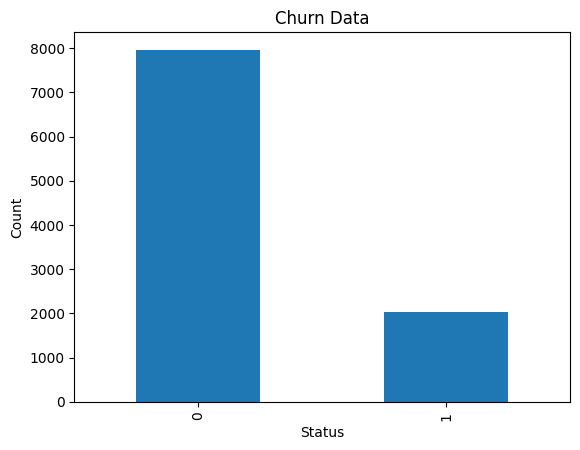

Exited
0    7963
1    2037
Name: count, dtype: int64


In [4]:
# Задание 9.1 
import matplotlib.pyplot as plt
counts = churn_data['Exited'].value_counts()

counts.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Churn Data')
plt.show()
print (counts)

Колличество лояльных клиентов банка в 3,9 раза превышает колличество ушедших клиентов.

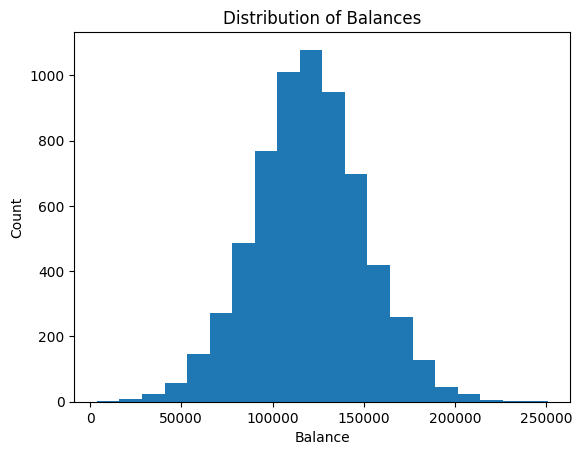

In [5]:
# Задание 9.2

filtered_data = churn_data[churn_data['Balance'] > 2500]
plt.hist(filtered_data['Balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balances')
plt.show()

Наибольшее количество клиентов с балансом болше 2 500 долларов, имеют баланс от 100 до 150 тыс. доларов, при этом отсутствут клиенты с балансом более 250 тыс. долларов.

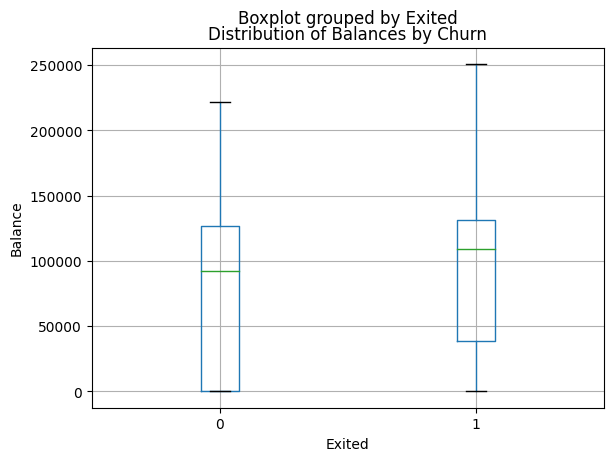

In [6]:
# Задание 9.3
churn_data.boxplot(column='Balance', by='Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.title('Distribution of Balances by Churn')
plt.show()

Баланс клиентов ушедших из банка имел больший размер по максимпльным и медианным значениям, чем у клиентов оставшихся в банке, из чего может следовать, что их не устраивали условия размещения крупных вкладов. 

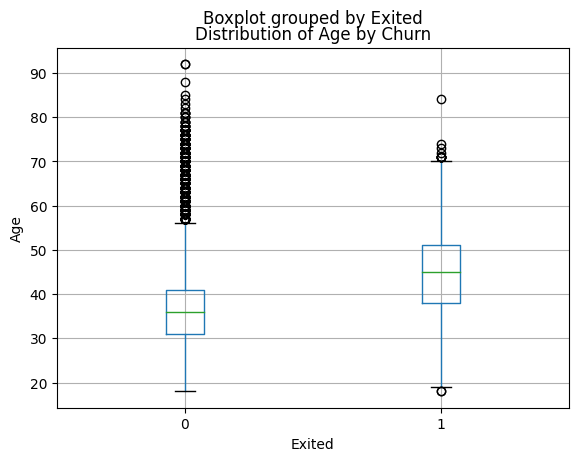

In [7]:
# Задание 9.4
churn_data.boxplot(column='Age', by='Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.title('Distribution of Age by Churn')
plt.show()

График "ящик с усами" позволяет наглядно сравнить распределение возраста клиентов в разрезе признака оттока. Ось X показывает статус лояльности клиента, а ось Y показывает возраст клиента. По этому графику можно сделать вывод, что возрастная группа от 55  имеет наибольшее количество выбросов (выбросы — это значения, которые находятся за пределами 1,5 межквартильного размаха). Это может указывать на то, что в этой возрастной группе меньше лояльных клиентов, чем в других возрастных группах. Также банку следует уделить внимание на возрастную группу от 40 до 50 лет, в которой находиться наибольшее количество клиентов ушедших из банка.

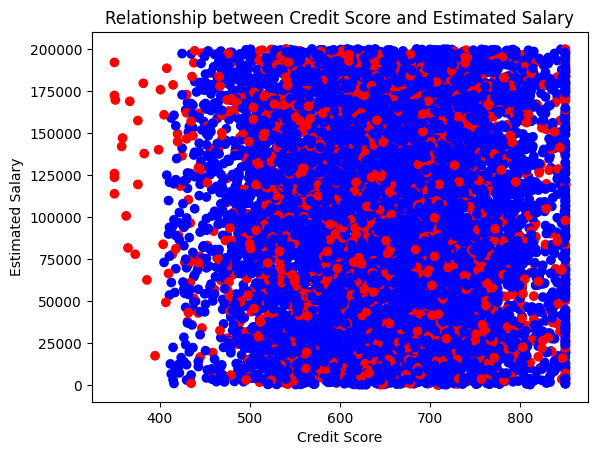

In [8]:
# Задание 9.5
colors = {0:'blue', 1:'red'}
plt.scatter(x=churn_data['CreditScore'], y=churn_data['EstimatedSalary'], c=churn_data['Exited'].apply(lambda x: colors[x]))
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.title('Relationship between Credit Score and Estimated Salary')
plt.show()

График рассеяния позволяет наглядно показать связь между кредитным рейтингом клиента и его предполагаемой зарплатой. Ось X показывает кредитный рейтинг, а ось Y - предполагаемую зарплату. Каждая точка на графике представляет одного клиента, а цвет точки указывает на его статус лояльности (ушедший клиент или лояльный клиент). По этому графику можно сделать вывод, что ушедшие клиенты и лояльные клиенты имеют примерно одинаковый кредитный рейтинг и предполагаемую зарплату, начиная с кредитного рейтинга больше 400. 

In [9]:
# Задание 9.6
import plotly.express as px

grouped_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()

fig = px.bar(
    data_frame=grouped_by_gender,
    x=grouped_by_gender.index,
    y='Exited',
    height=500,
    width=700,
    title='Percentage of departed customers by Gender'
)
fig.show()

График иллюстрирует, что женщины чаще (примерно на 60%) уходят из банка чем мужчины.

Text(0, 0.5, 'Number of clients')

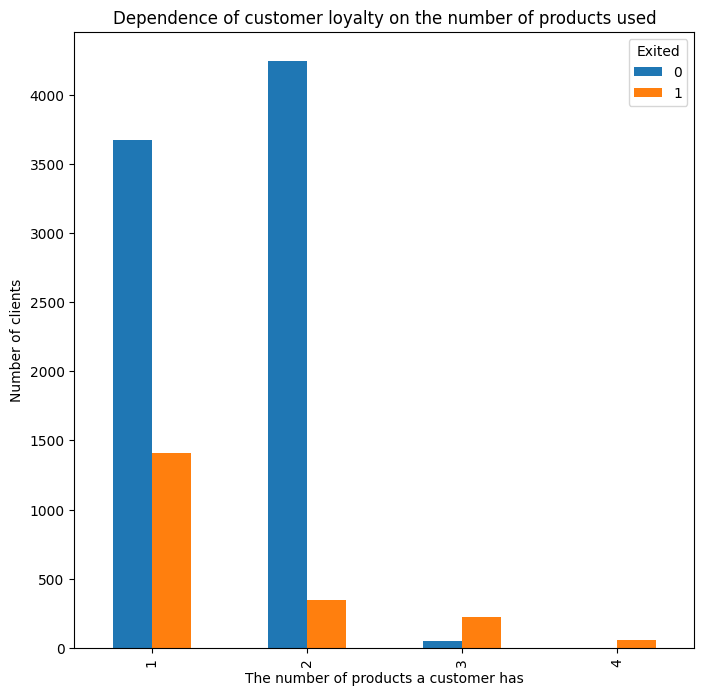

In [10]:
# Задание 9.7
pivot = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot = pivot.fillna(0) 

fig, axes = plt.subplots(figsize=(8, 8))
pivot.plot(kind='bar', ax=axes)
axes.set_title('Dependence of customer loyalty on the number of products used')
axes.set_xlabel('The number of products a customer has')
axes.set_ylabel('Number of clients')

График указывает на неодназначную зависимость лояльности клиентов от количества приобретаемых у банка услуг, так при росте колличества приобретенных услуг от 1 до 2 количество лояльных клиентов растет, а при увеличении до 3 резко снижается и клиенты с купившие 4 услуги все являются ушедшими из банка.

In [11]:
# Задание 9.8
pivot_2 = churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)
fig = px.bar(
    data_frame=pivot_2,
    width=1000,
    height=700,
    color='Exited',
    barmode='group',
    title='Number of Active vs Non-Active members between Loyal and Exited customers',
)
fig.update_layout(
    xaxis_title='Member Status',
    yaxis_title='Number of Members'
)
fig.show()

Исходя из графика следует, что среди активных клиентов больше лояльных и меньше  клиентов покинувших банк.

In [13]:
# Задание 9.9
pivot_3 = churn_data.pivot_table( values='Exited', index='Geography', aggfunc= 'mean', ) 
fig = px.choropleth(
    data_frame= pivot_3, 
    locations=pivot_3.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Share of lost customers by country', 
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Наибольшая доля ушедших клиентов, приходиться на клиентов из Германии

In [14]:
# Задание 9.10
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data ['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


pivot_4 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',
)


display(pivot_4)


fig = px.imshow(    
    pivot_4,
    labels={'x': 'Tenure', 'y': 'CreditScoreCat'},
    title='Heatmap'
)
fig.show()

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


На основе тепловой карты видно, что чаще всего из банка уходят клиенты с низшей категорией кредитного рейтинга "Very_Poor" и пользующиеся услугами банка менее года